# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
# Loading packages 

import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Reading in road data 
X = pd.read_csv('3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(1000)
X.head()

lat        lon        alt
234401  8.449426  56.855887  13.494604
286099  9.976817  57.323641  36.328023
48980   8.789672  56.890996  46.130555
145711  9.593939  57.251441  10.187147
39950   8.150701  56.601929   2.199211

In [3]:
# Setting up ranges for min_samples and epsilon
min_samples = np.arange(1,11,1)
epsilons = np.arange(0.05, 0.51, 0.01)

# Checking work 
print(min_samples, epsilons)

[ 1  2  3  4  5  6  7  8  9 10] [0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18
 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32
 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46
 0.47 0.48 0.49 0.5 ]


In [6]:
# Initializing list to store silhouette scores
all_scores = []

for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        # Applying DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(X)
        
        # Calculate silhouette score
        try:
            score = silhouette_score(X, labels)
        except:
            score = -1  # Set to -1 if silhouette score calculation fails
        
        scores.append(score)
        
    all_scores.append(scores)

# Converting the list to a numpy array for easier manipulation
silhouette_scores = np.array(all_scores)

<IPython.core.display.Javascript object>


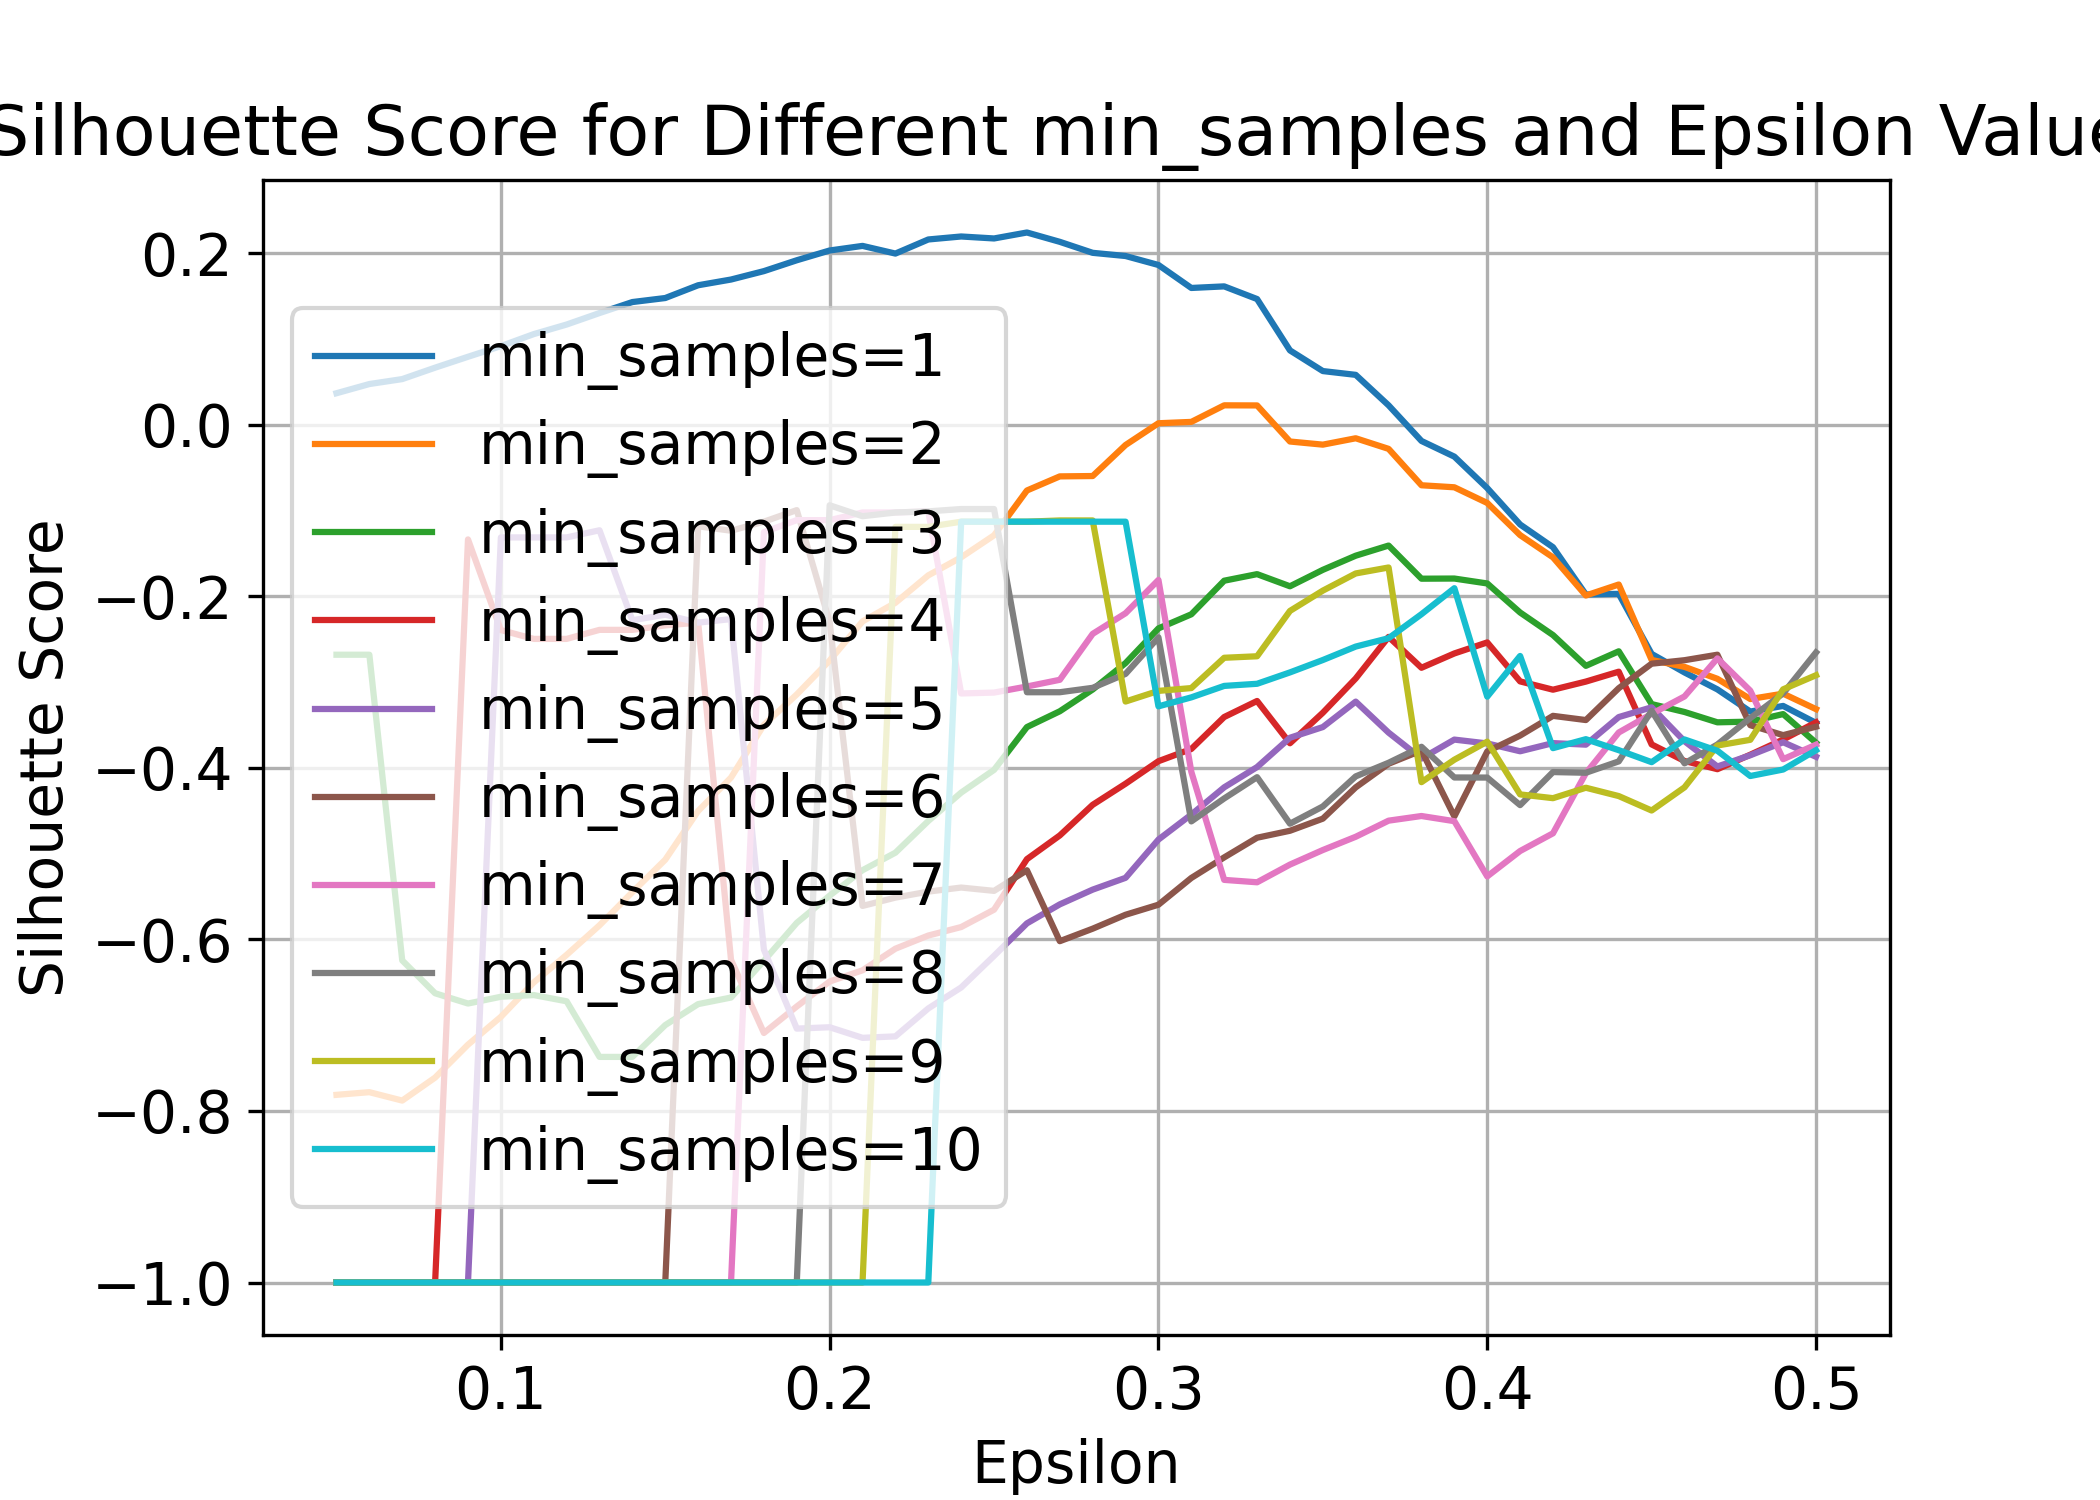

In [12]:
# Plotting the results
plt.figure(figsize=(7,5))
for i, min_sample in enumerate(min_samples):
    plt.plot(epsilons, silhouette_scores[i, :], label=f'min_samples={min_sample}')

plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different min_samples and Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [18]:
# Reading data 
penguin = pd.read_csv('penguins.csv')

# Dropping rows with missing data
penguin.dropna(inplace=True)

# Converting 'sex' to binary variable
penguin['sex'] = penguin['sex'].apply(lambda x: 1 if x == 'FEMALE' else 0)

# Previewing data
penguin.head()


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0    0
1              39.5             17.4              186.0       3800.0    1
2              40.3             18.0              195.0       3250.0    1
4              36.7             19.3              193.0       3450.0    1
5              39.3             20.6              190.0       3650.0    0

In [28]:
# Loading packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set OMP_NUM_THREADS environment variable to avoid memory leak warning on Windows
os.environ['OMP_NUM_THREADS'] = '4'

C:\Users\kaoui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kaoui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kaoui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kaoui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

<IPython.core.display.Javascript object>


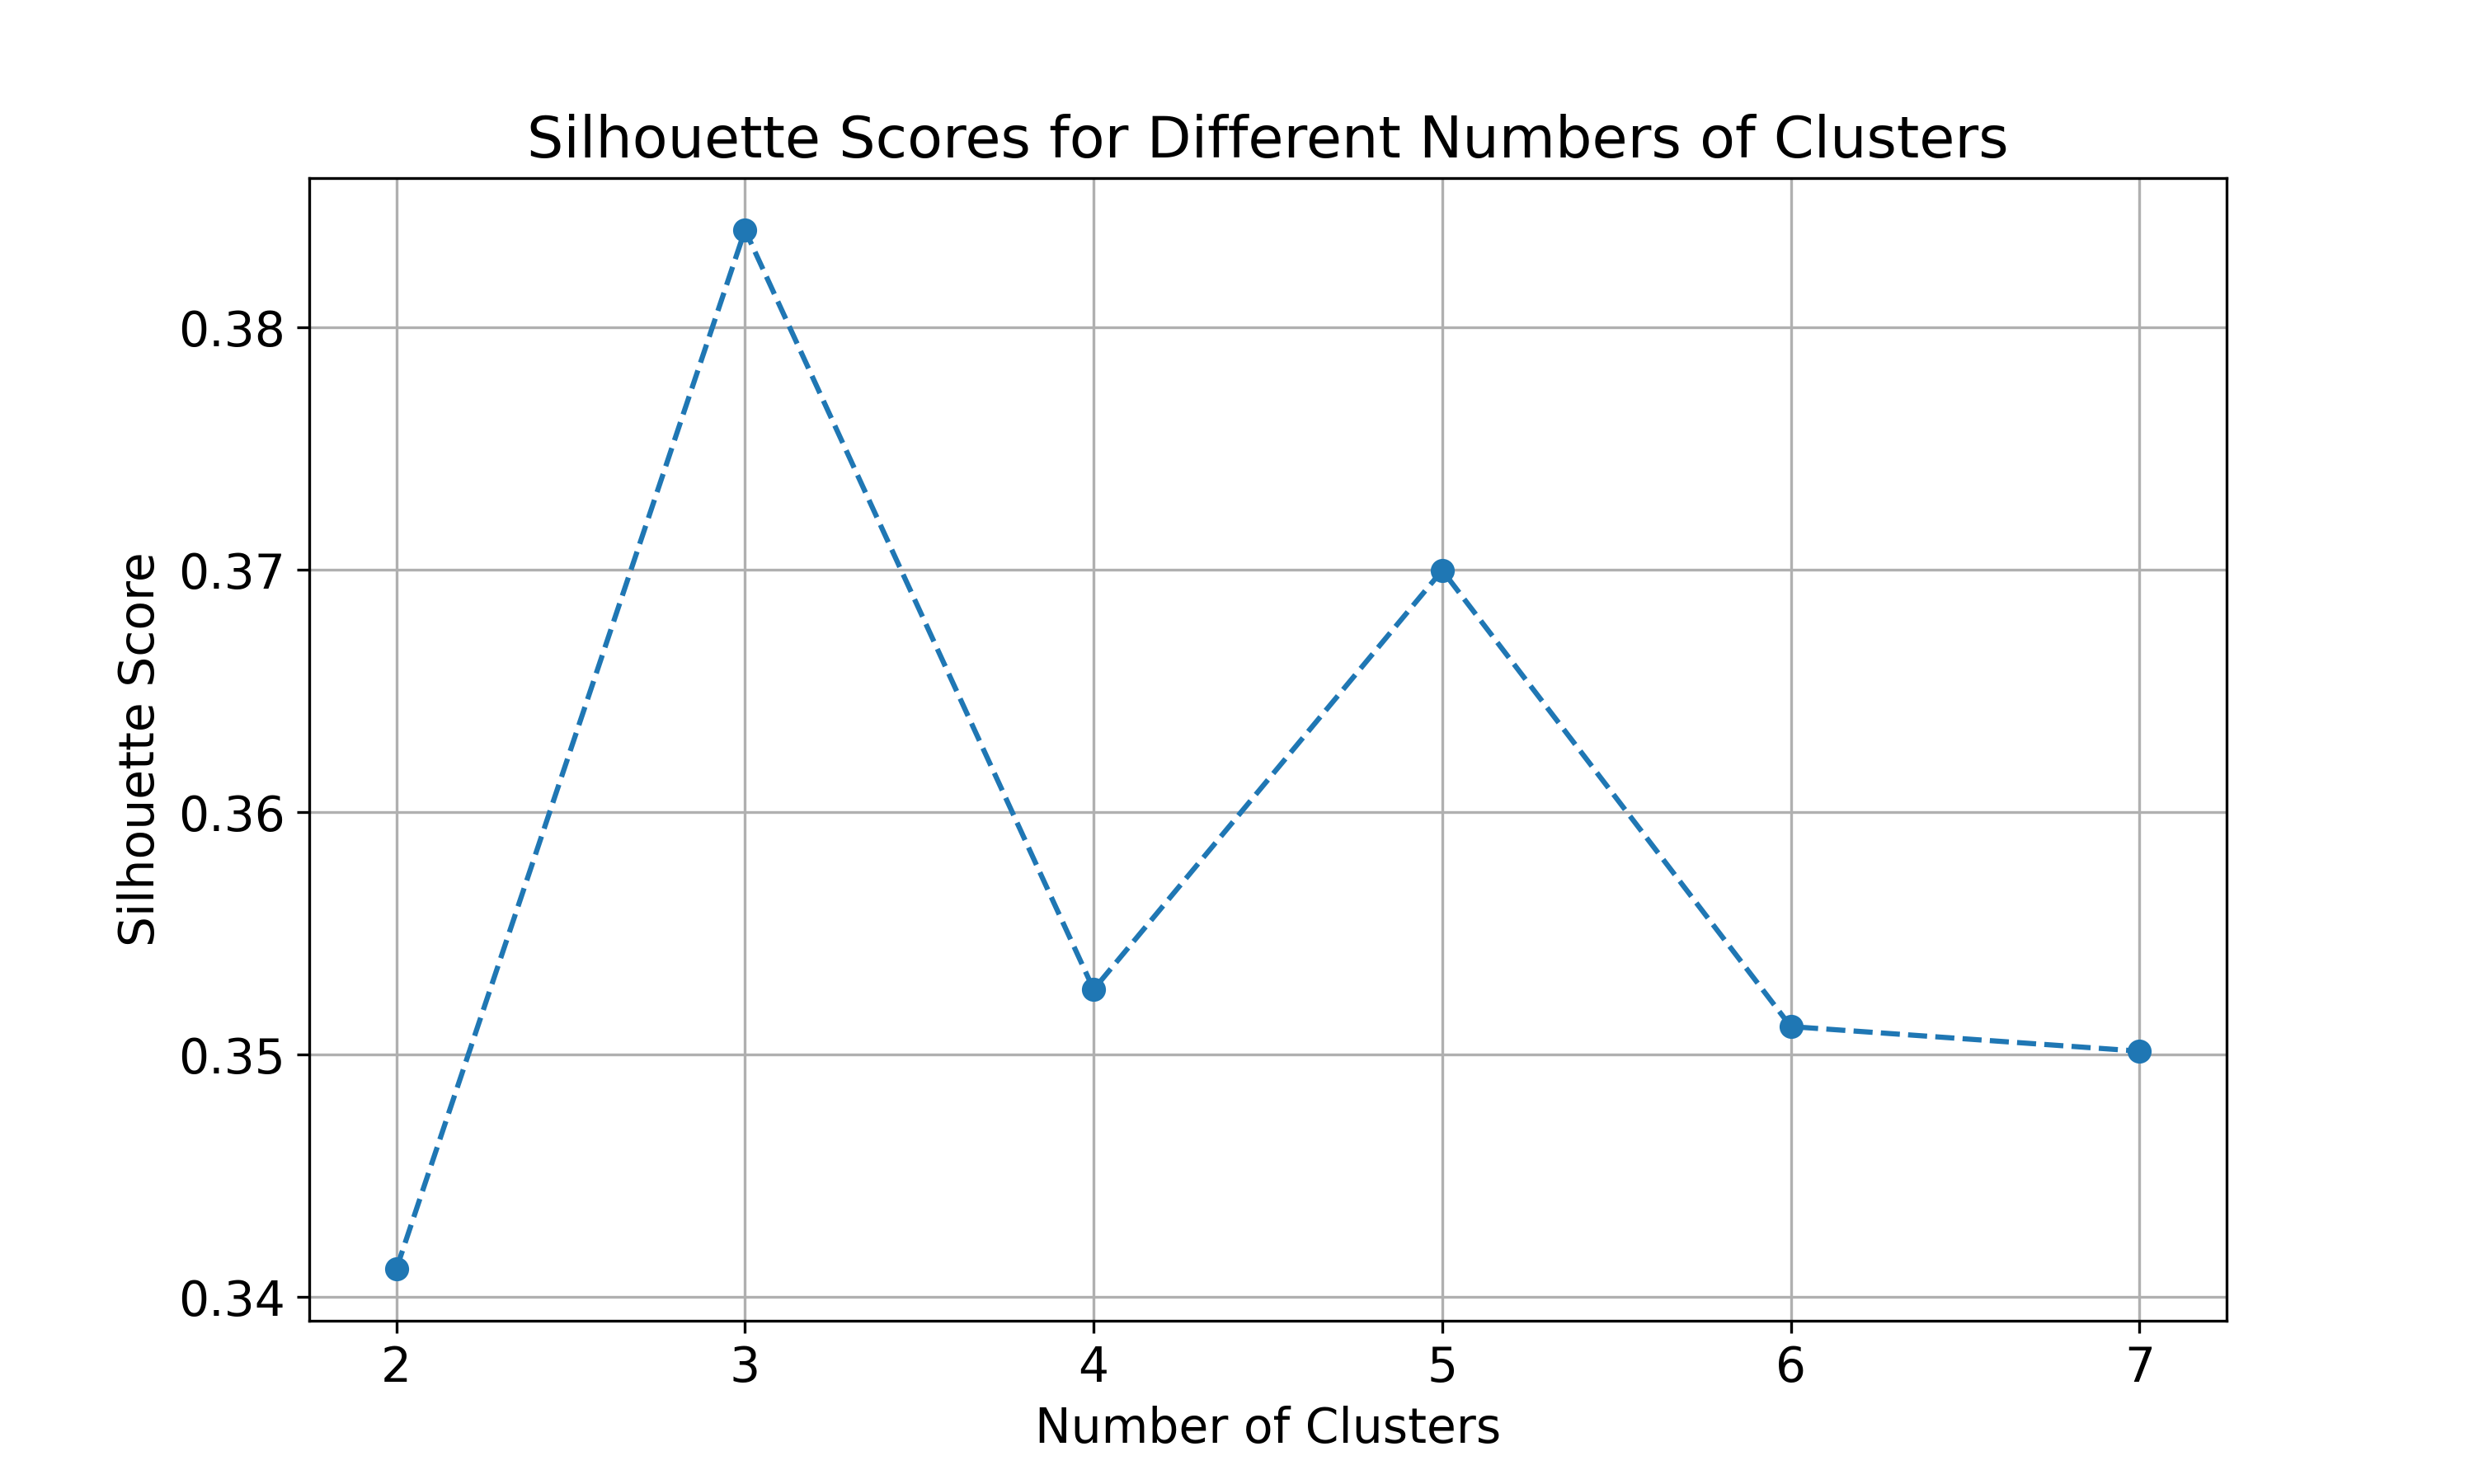

Optimal number of clusters based on silhouette score: 3


C:\Users\kaoui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<IPython.core.display.Javascript object>


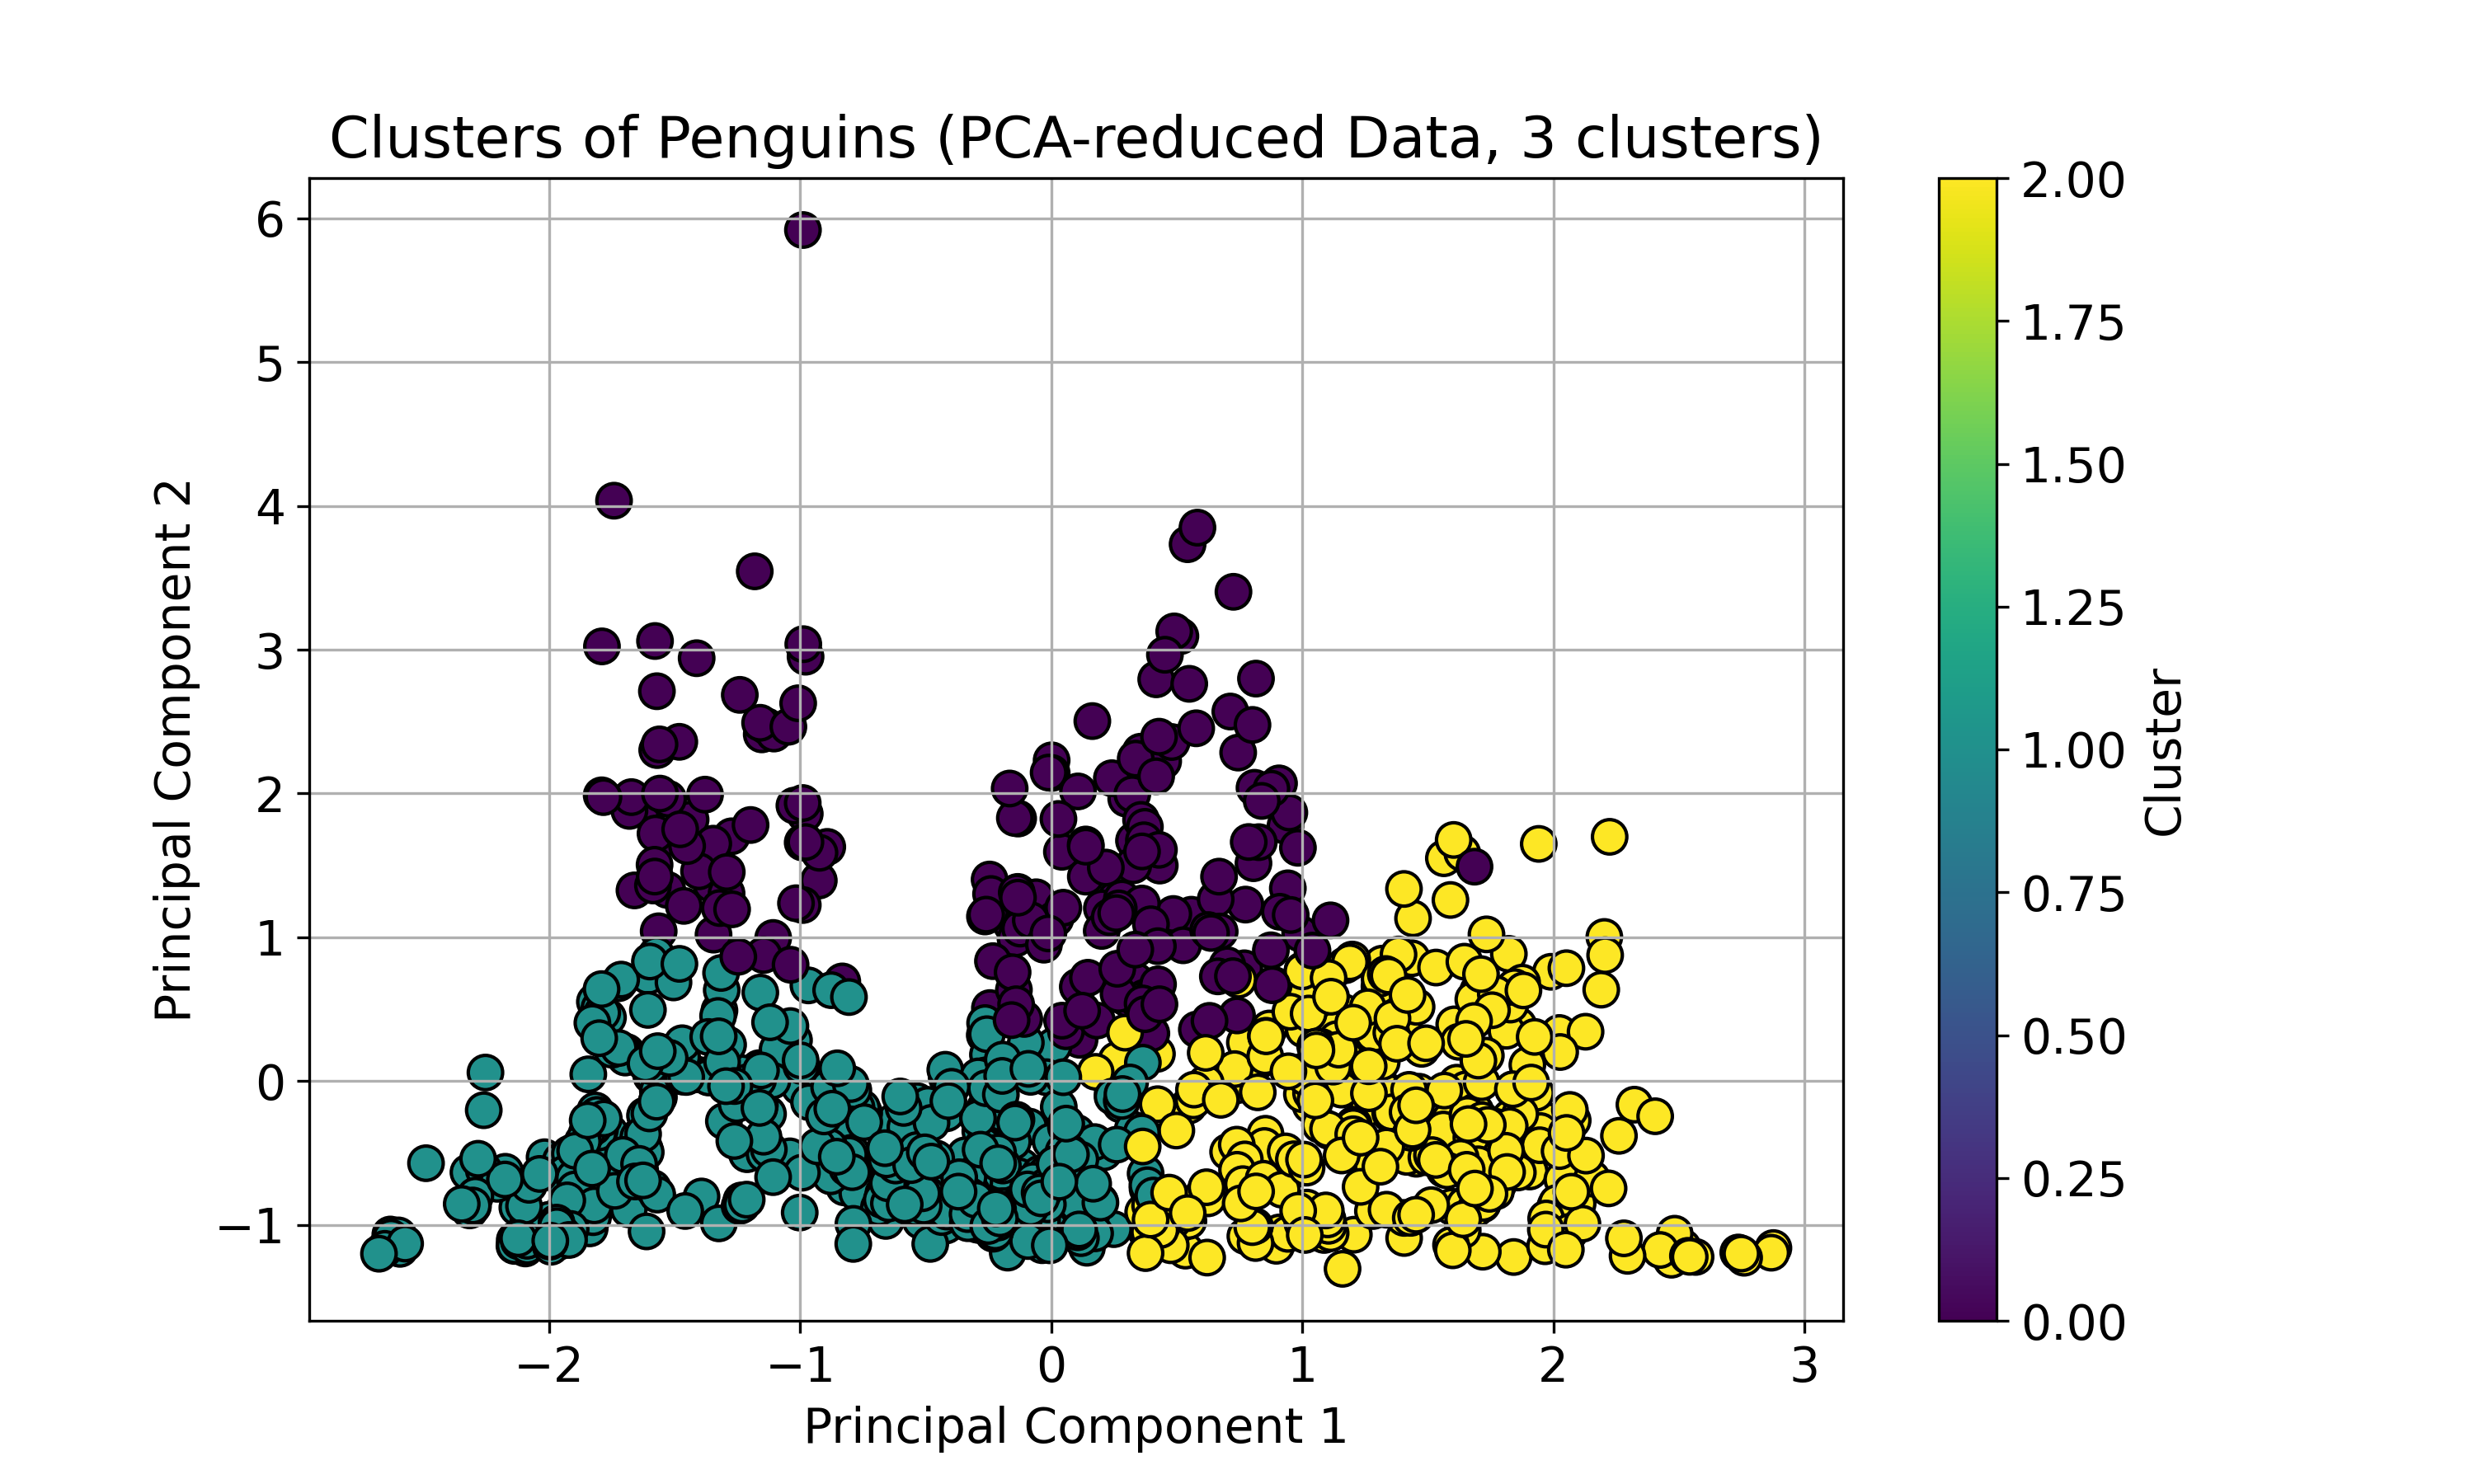

In [30]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Finding optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 8):  # trying clusters from 2 to 7
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
   

# Plotting silhouette scores 
plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 8))
plt.grid(True)
plt.show()

# Choosing optimal number of clusters based on silhouette score
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # index + 2 to account for starting from 2
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")

# Performing K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualizing clusters in 2D using PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
plt.title(f'Clusters of Penguins (PCA-reduced Data, {optimal_n_clusters} clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


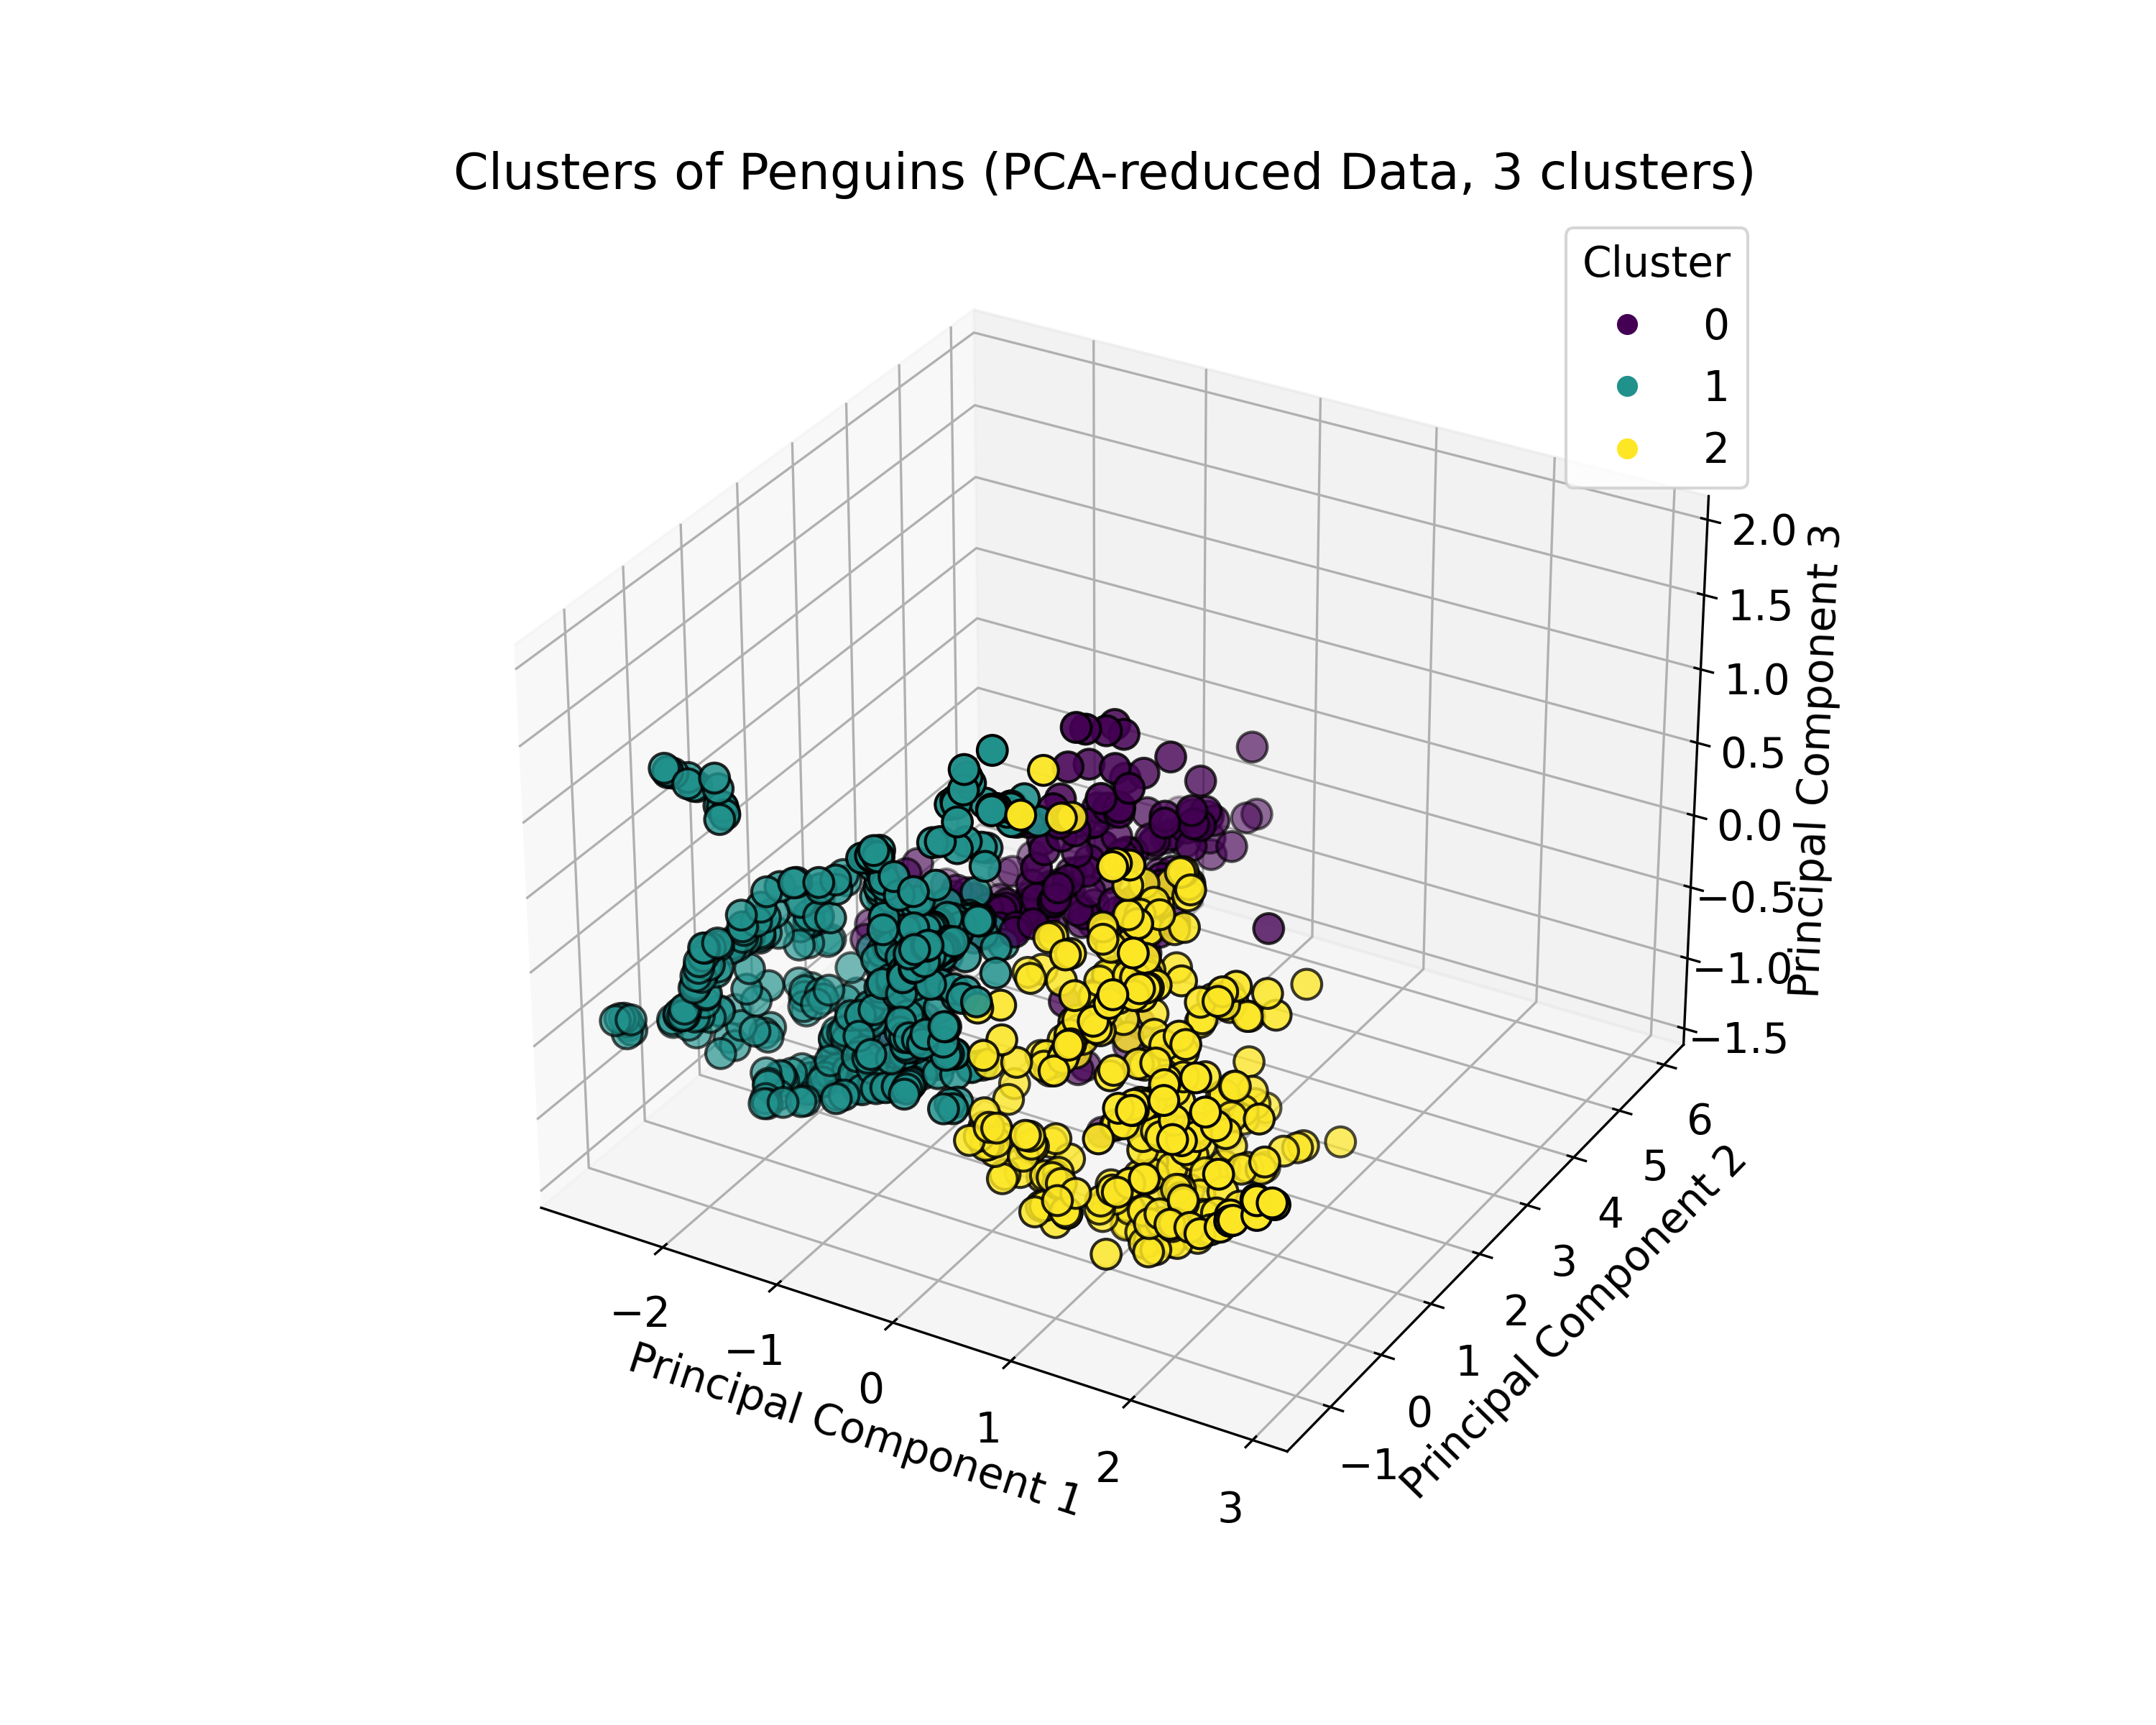

In [32]:
# Visualizing clusters in 3D using PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
ax.set_title(f'Clusters of Penguins (PCA-reduced Data, 3 clusters)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()